In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from pandas.tools.plotting import autocorrelation_plot 
from statsmodels.graphics.tsaplots import plot_pacf 
from statsmodels.tsa.arima_model import ARIMA, ARMAResults 
import datetime 
import sys 
import seaborn as sns 
import statsmodels 
import statsmodels.stats.diagnostic as diag 
from statsmodels.tsa.stattools import adfuller 


In [3]:
from scipy.stats.mstats import normaltest 
 
from matplotlib.pyplot import acorr 
plt.style.use('fivethirtyeight') 
%matplotlib inline 
ds = pd.read_csv('data_stocks.csv') 
ds.head() 


,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
ds['DATE'].dtypes

dtype('int64')

In [5]:
ds['DATE'] = pd.to_datetime(ds['DATE'], unit='s')

In [6]:
ds['DATE'].tail()

41261   2017-08-31 19:56:00
41262   2017-08-31 19:57:00
41263   2017-08-31 19:58:00
41264   2017-08-31 19:59:00
41265   2017-08-31 20:00:00
Name: DATE, dtype: datetime64[ns]

In [7]:
ds.index = ds['DATE']

In [8]:

ds.drop('DATE',axis = 1,inplace=True)

In [9]:
ds.tail()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-08-31 19:56:00,2472.22,44.72,164.11,155.090,83.67,106.565,114.49,47.150,142.425,45.130,...,99.675,99.53,49.485,40.955,76.360,32.285,62.110,76.88,114.31,62.7250
2017-08-31 19:57:00,2471.77,44.73,164.12,155.160,83.65,106.590,114.52,47.150,142.450,45.130,...,99.730,99.63,49.480,40.960,76.370,32.295,62.100,76.90,114.33,62.7100
2017-08-31 19:58:00,2470.03,44.74,164.01,155.065,83.62,106.520,114.47,47.150,142.330,45.135,...,99.735,99.64,49.495,40.940,76.315,32.290,62.090,76.88,114.31,62.6850
2017-08-31 19:59:00,2471.49,44.71,163.88,154.960,83.58,106.400,114.33,47.135,142.170,45.065,...,99.700,99.63,49.485,40.925,76.300,32.275,62.075,76.83,114.23,62.6301
2017-08-31 20:00:00,2471.49,44.74,163.98,155.160,83.69,106.470,114.46,47.150,142.410,45.120,...,99.670,99.64,49.490,40.940,76.320,32.270,62.070,76.81,114.28,62.6800


# Problem Statement: 
Pick up the following stocks and generate forecasts accordingly 
 Stocks: 
4. NASDAQ.CSCO 



In [10]:
ds_CSCO = ds[['NASDAQ.CSCO']].copy()


In [11]:
print(ds_CSCO.tail())


                     NASDAQ.CSCO
DATE                            
2017-08-31 19:56:00       32.185
2017-08-31 19:57:00       32.200
2017-08-31 19:58:00       32.200
2017-08-31 19:59:00       32.195
2017-08-31 20:00:00       32.225


In [12]:
ds_CSCO.count()

NASDAQ.CSCO    41266
dtype: int64

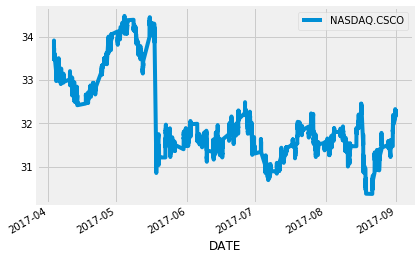

In [13]:
ds_CSCO.plot()

Stationary means mean,variance and covariance is constant over periods.

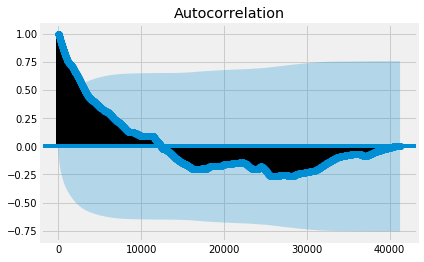

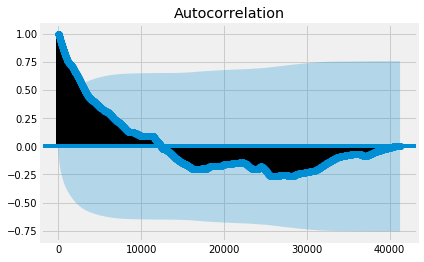

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ds_CSCO)

# Converting series to stationary

In [15]:

ds_CSCO.shift(1)

,NASDAQ.CSCO
DATE,
2017-04-03 13:30:00,NaN
2017-04-03 13:31:00,33.7400
2017-04-03 13:32:00,33.8800
2017-04-03 13:33:00,33.9000
2017-04-03 13:34:00,33.8499
2017-04-03 13:35:00,33.8400
2017-04-03 13:36:00,33.8800
2017-04-03 13:37:00,33.9000
2017-04-03 13:38:00,33.8900


In [16]:
X = ds_CSCO.values
train = X[0:28886] # 28886 data as train data
test = X[28886:] # 12380 data as test data
print(train.size)
print(test.size)
predictions = []

28886
12380


# ARIMA model

In [17]:
from statsmodels.tsa.arima_model import ARIMA

In [18]:

import itertools
p=d=q=range(0,6)
pdq=list(itertools.product(p,d,q))

In [ ]:

import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 85353.81423993816
(0, 0, 1) 46052.34616741127
(0, 1, 0) -135890.52761203377
(0, 1, 1) -135922.78479698225
(0, 1, 2) -135956.1620233126
(0, 1, 3) -135965.06574968295
(0, 1, 4) -136154.95023724908
(0, 1, 5) -136204.18413544493
(0, 2, 0) -116859.65854105703
(0, 2, 1) -135872.0941873336
(0, 2, 2) -135904.76575716044
(1, 0, 0) -135888.85266485103


In [25]:

#p,d,q 
#p -> Periods taken for auto regressive model
#d -> Integrated order, difference
#q -> Periods in moving average model
model_arima = ARIMA(train, order=(4,1,4))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-64744.94423435074


In [26]:
predictions = model_arima_fit.forecast(steps=12380)[0]
predictions

array([150.61361658, 150.61508213, 150.61485932, ..., 153.58414297,
       153.58438291, 153.58462284])

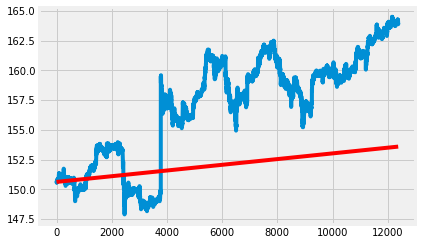

In [27]:
plt.plot(test)
plt.plot(predictions, color='red')

In [28]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test,predictions)

37.55078259648602


# The above forecasting done for NASDAQ.CSCO